# Happiness around the world

## About this notebook

This is an analysis of the [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness) dataset for the period 2015-2019.

The World Happiness Report is a publication of the [Sustainable Development Solutions Network](https://www.unsdsn.org/), powered by data from the [Gallup World Poll](https://www.gallup.com/178667/gallup-world-poll-work.aspx) and [Lloyd’s Register Foundation](https://www.lrfoundation.org.uk/). This report has information about happiness in the world based on a global survey.


In this notebook, the study is basically divided in two parts. The first is focused on determine the most influential factors in the happiness of a country for the year 2015. In the second, the objective is to study the temporal evolution of the happiness score in Argentina during the period 2015-2019.

## Table of contents
* 1: [Datasets](#data)
* 2: [Worldwide happiness data for 2015](#2015)
    * 2.1: [Exploratory analysis](#exploratory)
    * 2.2: [Exploratory analysis for Argentina](#exploratory-arg)
* 3: [Happiness in Argentina for the period 2015-2019](#2015-2019)
    * 3.1: [Preprocessing](#preproc)
    * 3.2: [Exploratory analysis](#exploratory-arg)
* 4: [Final thoughts](#thoughts)

<a name='data'></a>
## 1. Datasets

The datasets contain the happiness scores for the world. These values are based on people's responses to the task of rating their own current lives from 0 to 10 (with the best possible life as a 10). There is also information about six key factors that were considered in a regression model in the attempt to explain the happiness scores (for more details see [Reports](https://worldhappiness.report/archive/)). 

The six variables are:
- Economy (GDP per capita),
- Family (having someone to count on, social support),
- Health (life expectancy),
- Freedom (to make life choices),
- Trust (in government and businesses),
- Generosity.

Their values are a measure of how much each factor contribute (according to the model) to a country’s ladder score, relative to the score in Dystopia, an imaginary country that has the world's saddest people. It has the lowest scores for each of the six key variables. 

In the dataset there is another element called Dystopia Residual that is the sum of two components: Dystopia happiness score and the prediction error (residual) for each country.

Let's load the data.

In [1]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

data_2015 = pd.read_csv('./data/2015.csv')
data_2016 = pd.read_csv('./data/2016.csv')
data_2017 = pd.read_csv('./data/2017.csv')
data_2018 = pd.read_csv('./data/2018.csv')
data_2019 = pd.read_csv('./data/2019.csv')

<a name='2015'></a>
## 2. Worldwide happiness data for 2015

<a name="exploratory"></a>
### 2.1. Exploratory analysis

In this section, I present the data for 2015. Below you can see the first five rows of the dataset. 

In [2]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


As you can infere, the following is true for each country:

$Happiness \ Score ≈ Economy + Family + Health + Freedom + Trust + Generosity + Dystopia \ Residual$.

Let's see the statistical details.

In [3]:
data_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From the table above, we can make some deductions:
- This dataset includes information about 158 countries.
- The minimum and maximum happiness scores are 2.839 and 7.587, respectively.
- The mean happiness score is around 5.38.
- Taking into account the happiness score column, since the mean value is roughly equal to the median (50th percentile), we can say that the distribution is symmetric. 

Now, it is necessary to verify that there is no missing data.

In [4]:
data_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Next, there is a map of happiness scores. Notice that if you put the cursor on a given country, its score is displayed. 

From red to green are colored the least-happy to the happiest countries in the world. It seems that the happiest countries are in Europe, North America and Oceania. In opposition, most of the countries with the lowest happiness scores appears to be in Africa. 

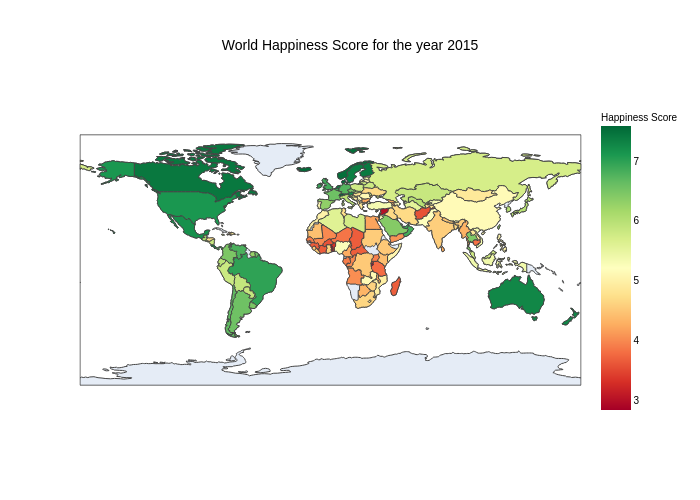

In [6]:
fig = go.Figure(data = go.Choropleth(
    locations = data_2015['Country'], 
    locationmode = 'country names',
    z = data_2015['Happiness Score'], 
    colorscale = 'RdYlGn',
    colorbar_title = 'Happiness Score'
))

fig.update_layout(
    title_text = 'World Happiness Score for the year 2015',
    title_x=0.5,
    font = dict(
    family="Arial",
    size=10,
    color='#000000'
    ),
    geo = dict(
    scope = 'world',
    projection = go.layout.geo.Projection(type = 'equirectangular'),
    showlakes = False)  
    )

# To see the interactive map set interactive = True.
interactive = False
if interactive:
    fig.show()
else:
    from IPython.display import Image, display
    display(Image(fig.to_image(format="png")))  # Requires kaleido package

To see the above more clearly, I estimate the average happiness score for each region and make a horizontal bar plot. 
As reference, the average value for the world is shown with a dotted gray line. The results agree with the previous conclusions.

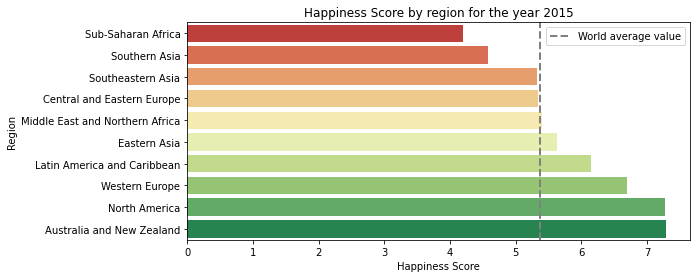

In [6]:
regional_happiness = data_2015.groupby('Region')['Happiness Score'].mean()
regional_happiness = pd.DataFrame({'Region':regional_happiness.index, 'Happiness Score':regional_happiness.values})
regional_happiness.sort_values(by = ['Happiness Score'], inplace = True)

fig_dims = (9, 4)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(ax = ax, x = 'Happiness Score', y = 'Region', data = regional_happiness, palette = 'RdYlGn')
ax.axvline(x = data_2015['Happiness Score'].mean(), color = 'gray', lw = 2, linestyle = '--', label = 'World average value')
ax.legend()
ax.set_title('Happiness Score by region for the year 2015');

In [7]:
idx_max = data_2015['Happiness Score'].idxmax(axis = 1)
idx_min = data_2015['Happiness Score'].idxmin(axis = 1)

print(f"Country with the highest score: {data_2015['Country'][idx_max]}")
print(f"Country with the lowest score: {data_2015['Country'][idx_min]}")

Country with the highest score: Switzerland
Country with the lowest score: Togo


To analyze the relationship between the elements involved in this analysis, let's plot the correlation matrix.

Considering the estimated correlation between two different variables, the farther the correlation coefficient is to 0, the stronger the linear relationship between them. If it takes a positive value, when one variable increases or decreases, the other reacts in the same way. If the coefficient is negative, as one variable increases, the other decreases and vice versa. 

For example, health and economy are strongly correlated with a coefficient of 0.82. This makes sense. More economic stability allows more access to important resources, such as food, housing and healthcare. 

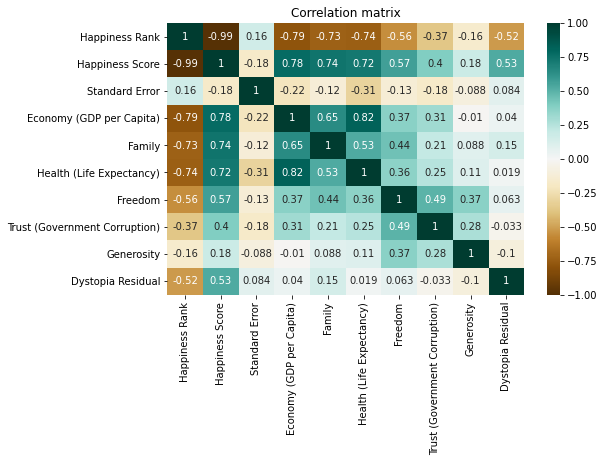

In [8]:
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize = fig_dims)
heatmap = sns.heatmap(data_2015.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
ax.set_title('Correlation matrix');

Making a scatter plot is another way to study the relationship between two variables. Also, we can think of fitting a line to the data. The better it fits, the higher the correlation coefficient. The slope of the line and the correlation coefficient share the same sign. 

As you can see in the correlation matrix and in the graphics below, all the factors have a positive correlation with happiness score, although with different strength. For example, generosity has a weak relationship with happiness. On the other hand, economy, family and health are the most dominant factors. As the value of one of them increases, the value of the happiness score increases. 


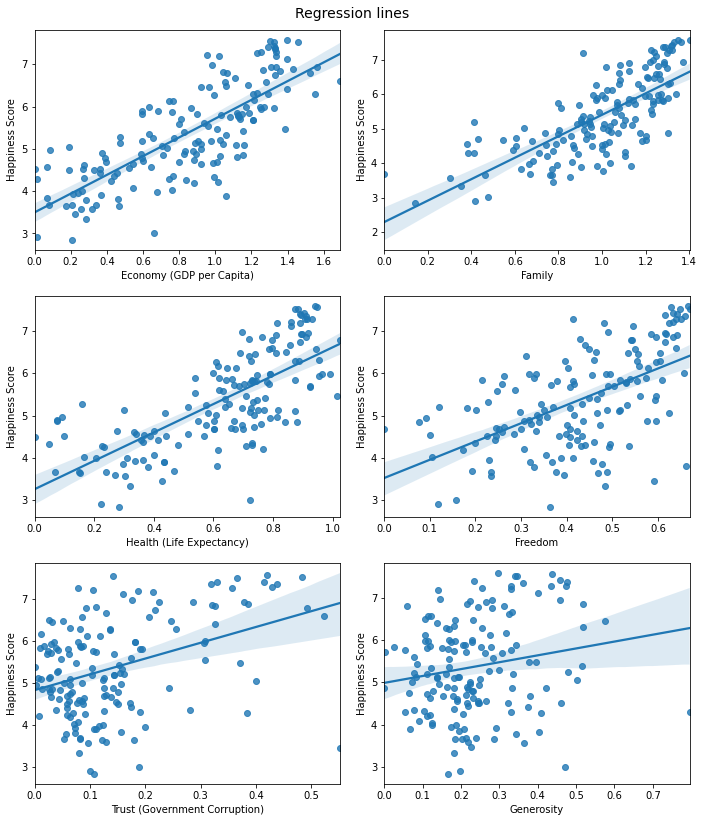

In [9]:
columns = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity']
columns.remove('Happiness Score')

a = 4
b = 2
c = 1 

fig = plt.figure(figsize=(10,15))
for i in columns:
    plt.subplot(a, b, c)
    sns.regplot(x = i, y = data_2015['Happiness Score'], data = data_2015)
    c = c + 1
fig.suptitle('Regression lines', fontsize = 14)
fig.tight_layout(pad = 1.5)

Finally, let's plot the histograms for each life factor.

The distributions of the variables economy, family, health and freedom are all left skewed. Most values are grouped around the right tail of the curve. This means that for most of the countries, these features take relatively high values.

In contrast, trust and generosity distributions are right skewed. A small number of countries  trust their government and perceive a generous environment.

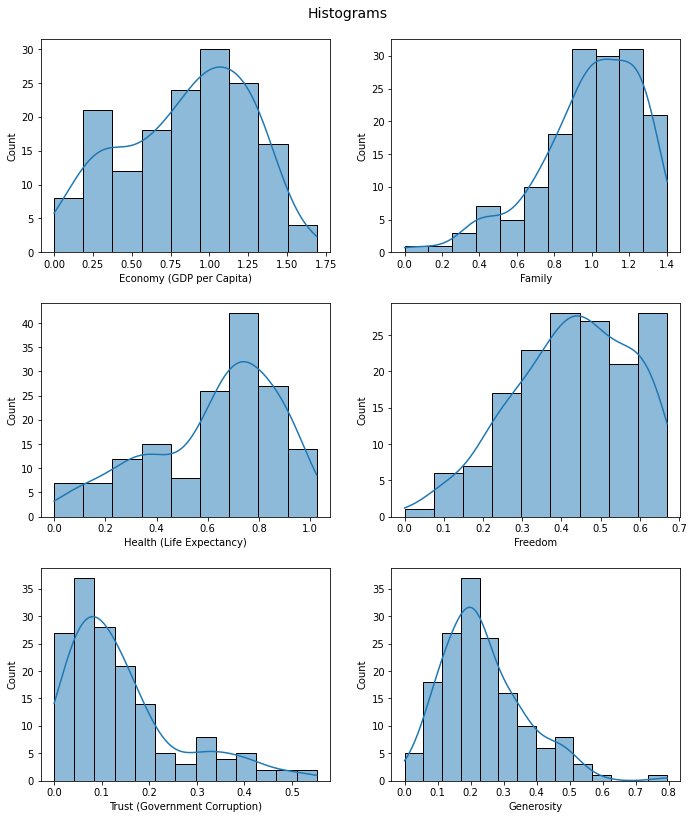

In [10]:
a = 4
b = 2
c = 1 

fig = plt.figure(figsize=(10,15))
for i in columns:
    plt.subplot(a, b, c)
    sns.histplot(data_2015, x = i, kde = True)
    c = c + 1
fig.suptitle('Histograms', fontsize = 14)
fig.tight_layout(pad = 2.0)

<a name="exploratory-arg"></a>
### 2.2. Exploratory analysis for Argentina

This section seeks to analyze the happiness score in Argentina for the year 2015. 

The score is about 6.57. Below, a table and a diagram with the values of each factor are shown. Economy and family are the variables that most impact the well-being of the Argentines.

In [11]:
print(f"Happiness score for Argentina: {data_2015[data_2015['Country'] == 'Argentina']['Happiness Score'].values[0]:.2f}")

Happiness score for Argentina: 6.57


In [12]:
data_2015_arg_barh = data_2015[data_2015['Country'] == 'Argentina']
data_2015_arg_barh = data_2015_arg_barh.drop(['Country', 'Region', 'Happiness Score', 'Happiness Rank', 'Standard Error'], axis = 1)
data_2015_arg_barh.index = ['Argentina']
data_2015_arg_barh

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Argentina,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.836


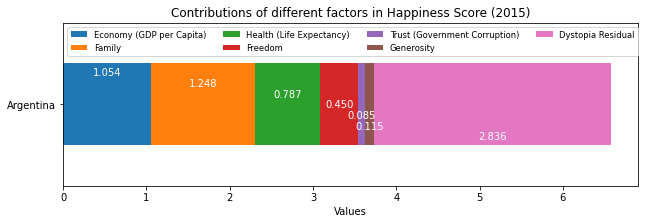

In [13]:
fig_dims = (10.3, 3)
fig, ax = plt.subplots(figsize = fig_dims)
data_2015_arg_barh.plot.barh(ax = ax, stacked = True)
ax.legend(ncol = 4, bbox_to_anchor = (0, 1), loc = 'upper left', fontsize = 'small')
ax.set_xlabel('Values')
ax.set_title('Contributions of different factors in Happiness Score (2015)')
l = 1
for p in ax.patches:
    ax.annotate('%.3f' % p.get_width(), (p.get_width()/2 + p.get_x(), p.get_height() * (0.35*l)), ha = 'center',
               color = 'white')
    l = l - 0.375

Next, there is a list of Latin American and Caribbean countries that have happiness scores higher than Argentina. 

In [14]:
arg_score = data_2015.loc[data_2015.Country == 'Argentina']['Happiness Score'].values
data_2015.loc[(data_2015.Region == 'Latin America and Caribbean') & (data_2015['Happiness Score'] >= arg_score[0])]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
11,Costa Rica,Latin America and Caribbean,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
13,Mexico,Latin America and Caribbean,14,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214
15,Brazil,Latin America and Caribbean,16,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001
22,Venezuela,Latin America and Caribbean,23,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
24,Panama,Latin America and Caribbean,25,6.786,0.04910,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848
26,Chile,Latin America and Caribbean,27,6.670,0.05800,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,2.67585
29,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


Aditionally, I create a bar plot to ilustrate the contributions of the different factors in each of the countries above.

In general, the happiness is directly associated with the economy of the country and social support.

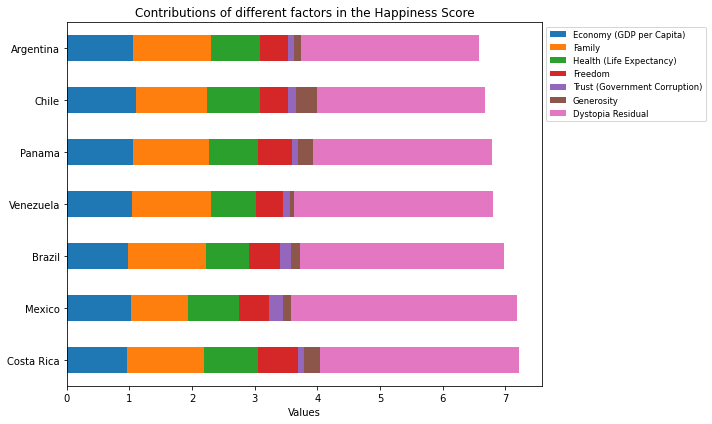

In [15]:
data_2015_latinam = data_2015.loc[(data_2015.Region == 'Latin America and Caribbean') 
                    & (data_2015['Happiness Score'] >= arg_score[0])]
data_2015_latinam_barh = data_2015_latinam.drop(['Country', 'Region', 'Happiness Score', 'Happiness Rank', 'Standard Error'], axis = 1)
data_2015_latinam_barh.index = data_2015_latinam.Country.tolist()

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize = fig_dims)
data_2015_latinam_barh.plot.barh(ax = ax, stacked = True)
ax.legend(ncol = 1, bbox_to_anchor = (1, 1), fontsize = 'small')
ax.set_xlabel('Values')
ax.set_title('Contributions of different factors in the Happiness Score')
fig.tight_layout()

<a name="2015-2019"></a>
## 3. Hapiness in Argentina for the period 2015-2019

In this section, the analysis is focused on Argentina, considering the period 2015-2019.

<a name="preproc"></a>
### 3.1. Preprocessing

In order to integrate the data needed (five datasets), it is necessary to preprocess the data because the names of the factors change from set to set.

In [16]:
factors = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 
           'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

data_2015_arg_plot = data_2015.loc[data_2015.Country == 'Argentina'][factors]

data_2016_arg_plot = data_2016.loc[data_2016.Country == 'Argentina'][factors]

data_2017 = data_2017.rename(columns = {'Happiness.Score':'Happiness Score',
                                        'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                                        'Health..Life.Expectancy.':'Health (Life Expectancy)', 
                                        'Trust..Government.Corruption.':'Trust (Government Corruption)', 
                                        'Dystopia.Residual':'Dystopia Residual'})
data_2017_arg_plot = data_2017.loc[data_2017.Country == 'Argentina'][factors]

data_2018 = data_2018.rename(columns = {'Country or region':'Country', 
                                        'Score':'Happiness Score',
                                        'GDP per capita':'Economy (GDP per Capita)', 
                                        'Social support':'Family',
                                        'Healthy life expectancy':'Health (Life Expectancy)', 
                                        'Freedom to make life choices':'Freedom',
                                        'Perceptions of corruption':'Trust (Government Corruption)'})
data_2018['Dystopia Residual'] = data_2018['Happiness Score'] - data_2018[factors[1:-1]].sum(axis = 1)
data_2018_arg_plot = data_2018.loc[data_2018.Country == 'Argentina'][factors]

data_2019 = data_2019.rename(columns = {'Country or region':'Country', 
                                        'Score':'Happiness Score',
                                        'GDP per capita':'Economy (GDP per Capita)', 
                                        'Social support':'Family',
                                        'Healthy life expectancy':'Health (Life Expectancy)', 
                                        'Freedom to make life choices':'Freedom',
                                        'Perceptions of corruption':'Trust (Government Corruption)'})
data_2019['Dystopia Residual'] = data_2019['Happiness Score'] - data_2019[factors[1:-1]].sum(axis = 1)
data_2019_arg_plot = data_2019.loc[data_2019.Country == 'Argentina'][factors]

<a name="exploratory-arg"></a>
### 3.2. Exploratory analysis

The following table shows the scores for Argentina across the years 2015-2019.

In [17]:
data_arg_plot = pd.concat([data_2015_arg_plot, data_2016_arg_plot, data_2017_arg_plot, data_2018_arg_plot, 
                           data_2019_arg_plot])
data_arg_plot.index = ['2015', '2016', '2017', '2018', '2019']
data_arg_plot

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
2015,6.574,1.053510,1.248230,0.787230,0.449740,0.08484,0.114510,2.836000
2016,6.650,1.151370,1.066120,0.697110,0.422840,0.07296,0.109890,3.129850
2017,6.599,1.185295,1.440451,0.695137,0.494519,0.05974,0.109457,2.614005
2018,6.388,1.073000,1.468000,0.744000,0.570000,0.05400,0.062000,2.417000
2019,6.086,1.092000,1.432000,0.881000,0.471000,0.05000,0.066000,2.094000


Let's see the evolution of the happiness score over time. 

Based on the plot below, unfortunately and with the exception of 2016, the happiness score in Argentina has a clear decreasing trend. Between the year 2015 and 2019 the value fell almost 0.5 points. 

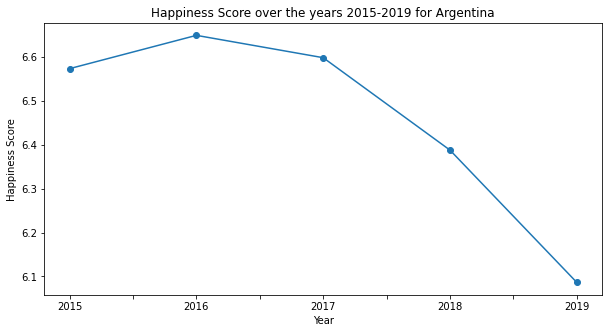

In [18]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize = fig_dims)
data_arg_plot[data_arg_plot.columns[0]].plot(ax = ax, style = '-o')
ax.set_xlabel('Year')
ax.set_ylabel('Happiness Score')
ax.set_title('Happiness Score over the years 2015-2019 for Argentina');

Finally, let's take a look at the behavior of the life factors throughout the same period. In an attempt to facilitate the visualization, I scaled the components using mean normalization:
\begin{equation}
    x' = \frac{x - x_{mean}}{x_{max} - x_{min}}
\end{equation}
where $x$ is the original value, $x'$ is the scaled value and $x_{mean}$, $x_{max}$ and $x_{min}$ are the average, maximum and minimum value for the feature considered.


In [19]:
data_arg_plot_mean = data_arg_plot.mean(axis = 0)
data_arg_plot_max = data_arg_plot.max(axis = 0)
data_arg_plot_min = data_arg_plot.min(axis = 0)
norm_data_arg_plot = (data_arg_plot - data_arg_plot_mean) / (data_arg_plot_max - data_arg_plot_min)
norm_data_arg_plot

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
2015,0.203191,-0.436506,-0.205858,0.141688,-0.216634,0.589323,0.421607,0.210290
2016,0.337943,0.306065,-0.659003,-0.343185,-0.399428,0.248336,0.333624,0.493970
2017,0.247518,0.563494,0.272447,-0.353800,0.087655,-0.131116,0.325379,-0.004022
2018,-0.126596,-0.288614,0.340997,-0.090903,0.600572,-0.295866,-0.578393,-0.194209
2019,-0.662057,-0.144440,0.251418,0.646200,-0.072165,-0.410677,-0.502217,-0.506030


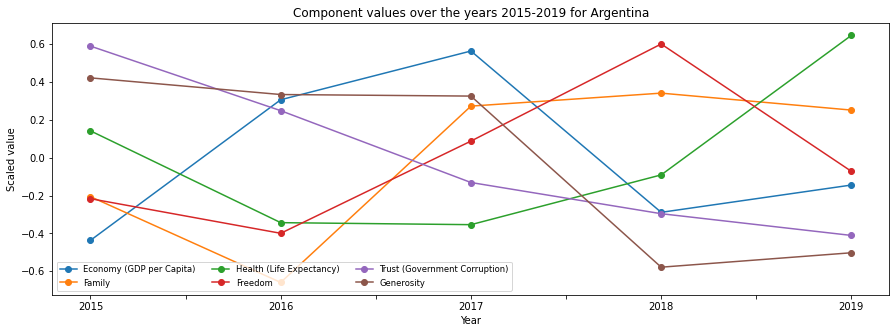

In [20]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize = fig_dims)
norm_data_arg_plot[norm_data_arg_plot.columns[1:-1]].plot(ax = ax, style = '-o')
ax.legend(ncol = 3, fontsize = 'small')
ax.set_xlabel('Year')
ax.set_ylabel('Scaled value')
ax.set_title('Component values over the years 2015-2019 for Argentina');

According to the plot above, generosity and trust have a consistent decline across these years. The remaining features seem to fluctuate more. 

<a name="thoughts"></a>
## 4. Final thoughts

The first part of this notebook shows Switzerland, the Nordics, Canada, New Zealand and Australia as the happiest countries on Earth in 2015. 

As expected, the most dominant factors in the happiness of a nation appears to be economy, family (social support) and health (life expectancy). To a lesser extent, the components freedom, trust (in government) and generosity also have a positive effect on the wellness of the people.

With respect to Argentina, the happiness score is reducing year by year. I hope this trend will be reversed in coming years.